In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import sklearn.cluster
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# loading datasets

In [12]:
# load datasets


dataset_ana= pd.read_csv('powerline_anomaly.csv')
dataset_norm=pd.read_csv('powerline_normal.csv')


#dropping the columns of index which is getting duplicated

datanorm=dataset_norm.drop(columns=['Unnamed: 0'])
dataset_ana=dataset_ana.drop(columns=['Unnamed: 0'])
dataset_ana.head()



,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


# split the data

In [3]:
#split normal dataset


training_dataset_norm, test_dataset_norm = train_test_split(datanorm, train_size=0.8)
print(training_dataset_norm.shape)

(5204, 6)


In [4]:
#train head
training_dataset_norm.head()
#test head
test_dataset_norm.head()

output = np.array([0]*len(test_dataset_norm)+[1]*len(dataset_ana), dtype=np.float_)


#labels=labels.to_dataframe

output = pd.DataFrame(output)

# concat testing and training datasets

concat_dataset=pd.concat([dataset_ana, test_dataset_norm], axis=0)


concat_dataset.reset_index(drop=True, inplace=True)


concat_dataset.tail()

,Ia,Ib,Ic,Va,Vb,Vc
6792,54.045715,11.977671,-69.065806,-0.005724,0.540033,-0.534309
6793,34.164923,-55.664323,36.732763,0.596702,-0.193329,-0.403373
6794,-61.798045,30.243754,33.378962,0.151417,-0.571221,0.419804
6795,0.197407,-39.748699,41.748021,0.593854,-0.355475,-0.238379
6796,-49.692066,-9.594764,61.962494,0.345035,-0.600207,0.255173


# scale and train the model

In [5]:
#scaling the training set

scaler = StandardScaler()
# transform data
training_dataset_norm = scaler.fit_transform(training_dataset_norm)

#scale the tests data

scalers = StandardScaler()
concat_dataset = scalers.fit_transform(concat_dataset)




In [6]:

# train guassian mixture model on 5 componensts


gmm = GaussianMixture(n_components=5, random_state=0)
preds = gmm.fit(training_dataset_norm)
#predict_train=preds.predict(concat_dataset)
#print(predict_train)
'''
n1=0
n2=0
n3=0
n4=0
n5=0
n6=0
k=0
for i in predict_train:
    if i==0:
        n1=1
      #  print("0")
        k+=1
    if i==1:
        n2=1
       # print("1")
        k+=1
    if i==2:
        n3=1
       # print("2")
        k+=1
    if i==3:
        n4=1
        #print("3")
        k+=1
    if i==4:
        n5=1
        #print("4")
        k+=1
    if i==5:
        n6=1
        #print("5")
        k+=1
#print(k) 
#print(len(predict_train))
        
'''

'\nn1=0\nn2=0\nn3=0\nn4=0\nn5=0\nn6=0\nk=0\nfor i in predict_train:\n    if i==0:\n        n1=1\n      #  print("0")\n        k+=1\n    if i==1:\n        n2=1\n       # print("1")\n        k+=1\n    if i==2:\n        n3=1\n       # print("2")\n        k+=1\n    if i==3:\n        n4=1\n        #print("3")\n        k+=1\n    if i==4:\n        n5=1\n        #print("4")\n        k+=1\n    if i==5:\n        n6=1\n        #print("5")\n        k+=1\n#print(k) \n#print(len(predict_train))\n        \n'

In [7]:
score_samp=preds.score_samples(scaler.fit_transform(concat_dataset))
convert_numpy = np.exp(score_samp).reshape(-1, 1)
normalize = StandardScaler().fit_transform(convert_numpy).reshape(-1)
threshold = -norm.ppf(0.05)  
classification = normalize < threshold
classification

array([ True,  True,  True, ...,  True,  True,  True])

# evaluation


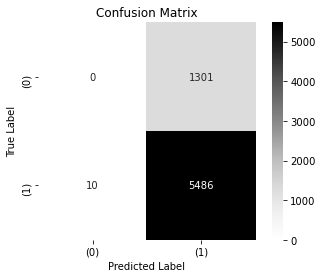

In [8]:
#Report the results using an appropriate metric

conf_mat = confusion_matrix(output, classification)

lang = ['(0)', '(1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [9]:
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
accuracy = accuracy_score(output, classification)
print("GMM models Evauuation")
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Precision:", tp/(tp+fp))
print("Recall:", tp/(tp+fn))
print("Accuracy:", accuracy)

GMM models Evauuation
True Positives: 5486
True Negatives: 0
False Positives: 1301
False Negatives: 10
Precision: 0.8083100044202152
Recall: 0.9981804949053857
Accuracy: 0.8071207885831985


[-3254.67411097 -2044.28490447 -1534.56013864 ... -1680.79647069
 -8239.31813172 -4524.32969538]
[-3254.67411097 -2044.28490447 -1534.56013864 ... -1680.79647069
 -8239.31813172 -4524.32969538]
[-3254.67411097 -2044.28490447 -1534.56013864 ... -1680.79647069
 -8239.31813172 -4524.32969538]
[-3254.67411097 -2044.28490447 -1534.56013864 ... -1680.79647069
 -8239.31813172 -4524.32969538]
[-3254.67411097 -2044.28490447 -1534.56013864 ... -1680.79647069
 -8239.31813172 -4524.32969538]


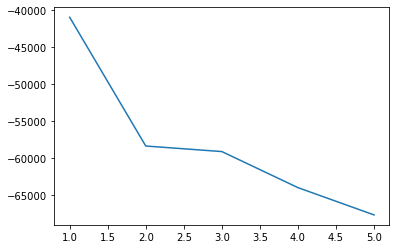

In [10]:
# Perform a grid search on the number of components and the density threshold to 
#improve the classification results

bic = np.zeros(5)
n = np.arange(1,6)
models = []
#loop through each number of Gaussians and compute the BIC, and save the model
for i,j in enumerate(n):
    #create mixture model with j components
    gm = GaussianMixture(n_components=j)
    #fit the data
    gm.fit(training_dataset_norm)
    #computing the BIC of this models
    
    score_samp=preds.score_samples(scaler.fit_transform(concat_dataset))
    print(score_samp)
    bic[i] = gm.bic(training_dataset_norm)
    #add  best model with j components 
    models.append(gm)

plt.plot(n,bic)

#print(bic)




Here the hyperparamter selection can be done by looking at the above figure where I have done grid search using BIC(Bayesian information criterion), and here I am using elbow method to do the choose the best model and I think if I go with that I might choose the number of clusters(components as 5) as I have done grid search on 5 compenents(you can just increase the number bic and np.zeros to select how many components we want). we can choose the elbow method and in the above graph it is more likely to be 2, but if we increase the number of components it can be greater than that as well, but the main idea of elbow method iss that the values don't descend that much after a certain point although in the above figure it might not look like an elbow but if we increase the number of compenets then it is likely to be more. I think 5 would be the best model because it has more accurate readings compared to the other number of components. But then if you want to make a tradeoff between computation resources and the accuracy we can choose whichever is better accordingly. But yeah the values(increasing components) after a certain point don't descend in the plot. 







